In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('cleaned_augmented_2.csv')
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,readmitted_<30,readmitted_>30,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,9,0,0,1,0,0,0,1,0
1,0,0,0,25,1,0,0,1,0,0,...,5,4,0,0,1,0,0,0,0,0
2,1,1,1,28,0,0,0,0,1,0,...,0,4,0,0,1,0,0,0,0,0
3,1,0,1,27,0,0,0,1,1,1,...,1,9,0,0,1,0,0,0,0,0
4,1,1,1,24,0,0,0,1,1,1,...,0,4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,5,0,0,1,0,0,0,0,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,7,1,0,0,0,0,0,0,1
253677,0,0,1,28,0,0,0,1,1,0,...,2,5,0,0,1,0,0,0,1,0
253678,1,0,1,23,0,0,0,0,1,1,...,1,9,0,0,1,0,0,0,0,0


In [3]:
X = df.iloc[:,0:-1]
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
X = pd.DataFrame(X_sc, columns=X.columns)
y = df.loc[:, 'Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 1)

In [4]:
accuracy_list = []
accuracy_metric_list = []
accuracy_k_list = []
precision_list = []
precision_metric_list = []
precision_k_list = []
f1_list = []
f1_metric_list = []
f1_k_list = []

In [5]:
k_range = [i for i in range(0,105)]
k_value = k_range[1:30:2]
#k_value = [i for i in range(1, 30)]

## Trial 1

In [6]:
start = datetime.now()

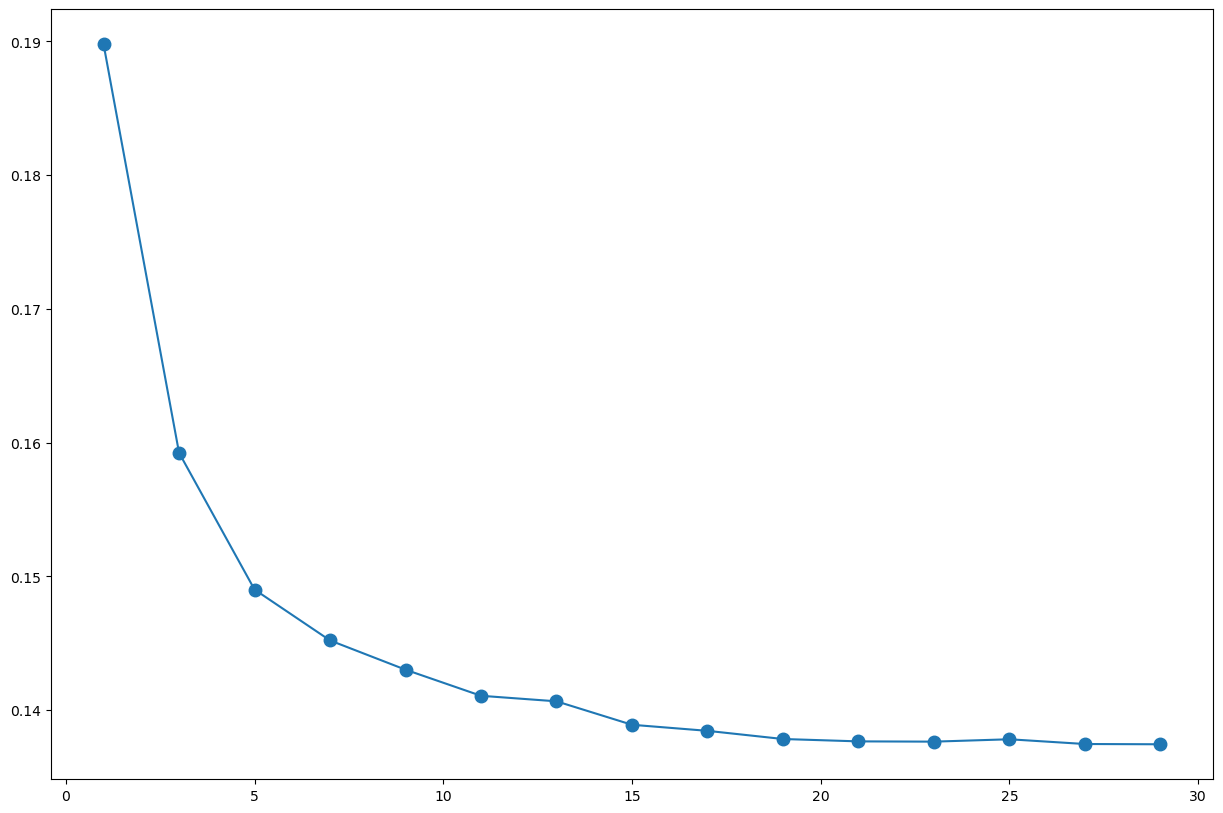

In [14]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [15]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [16]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.8625630715862503


In [17]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [18]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.29328440366972475


In [19]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [20]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5464646464646464


## Trial 2

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 2)

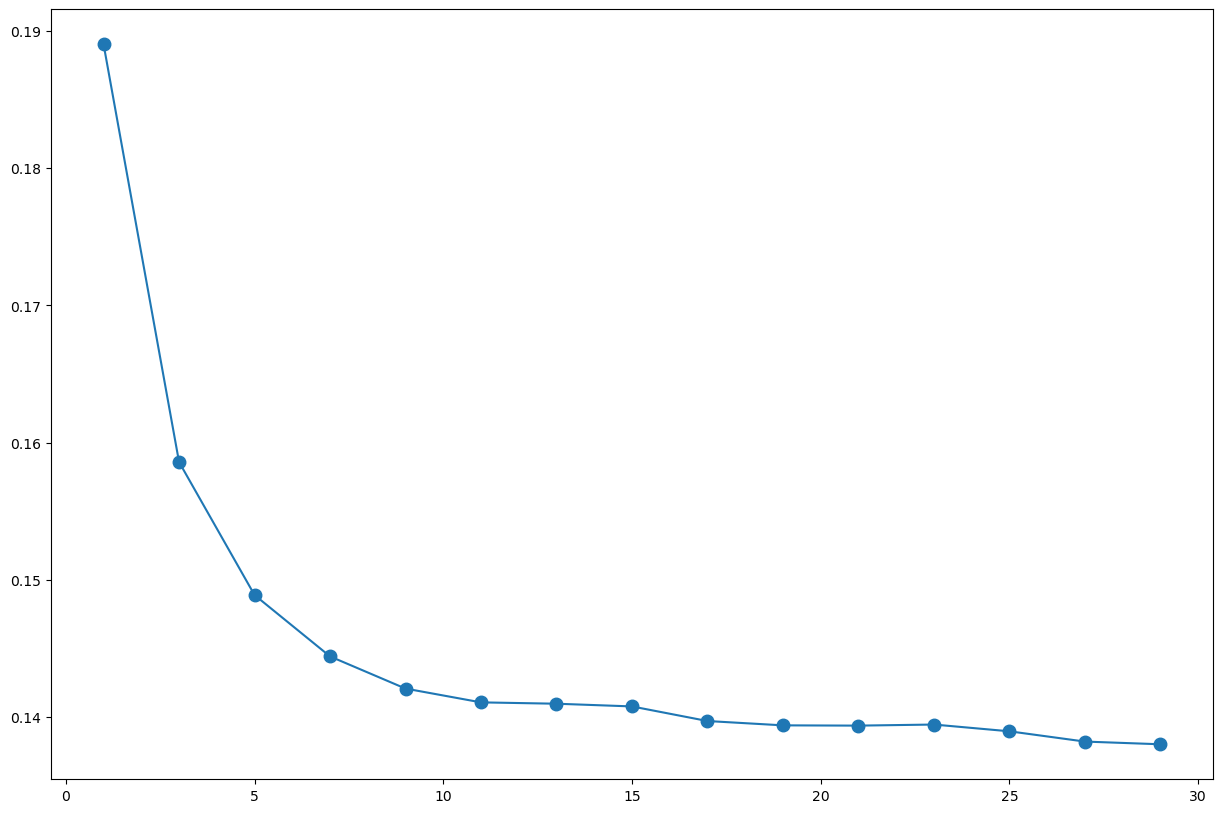

In [22]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [23]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [24]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.8619914853358562


In [25]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [26]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2964864666617766


In [27]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [28]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5691823899371069


## Trial 3

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 3)

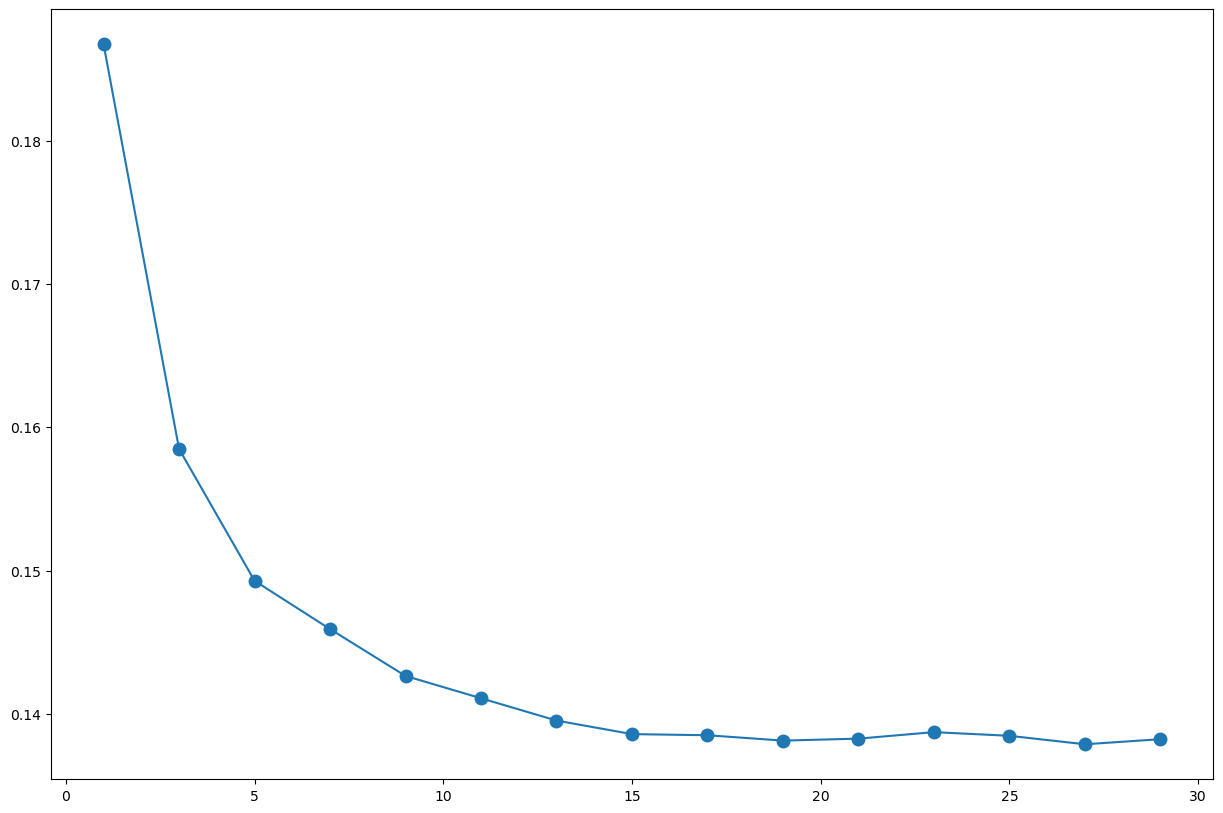

In [30]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [31]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [32]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.8621294544307789


In [33]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [34]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2984300947867299


In [35]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [36]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.5204359673024523


## Trial 4

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 4)

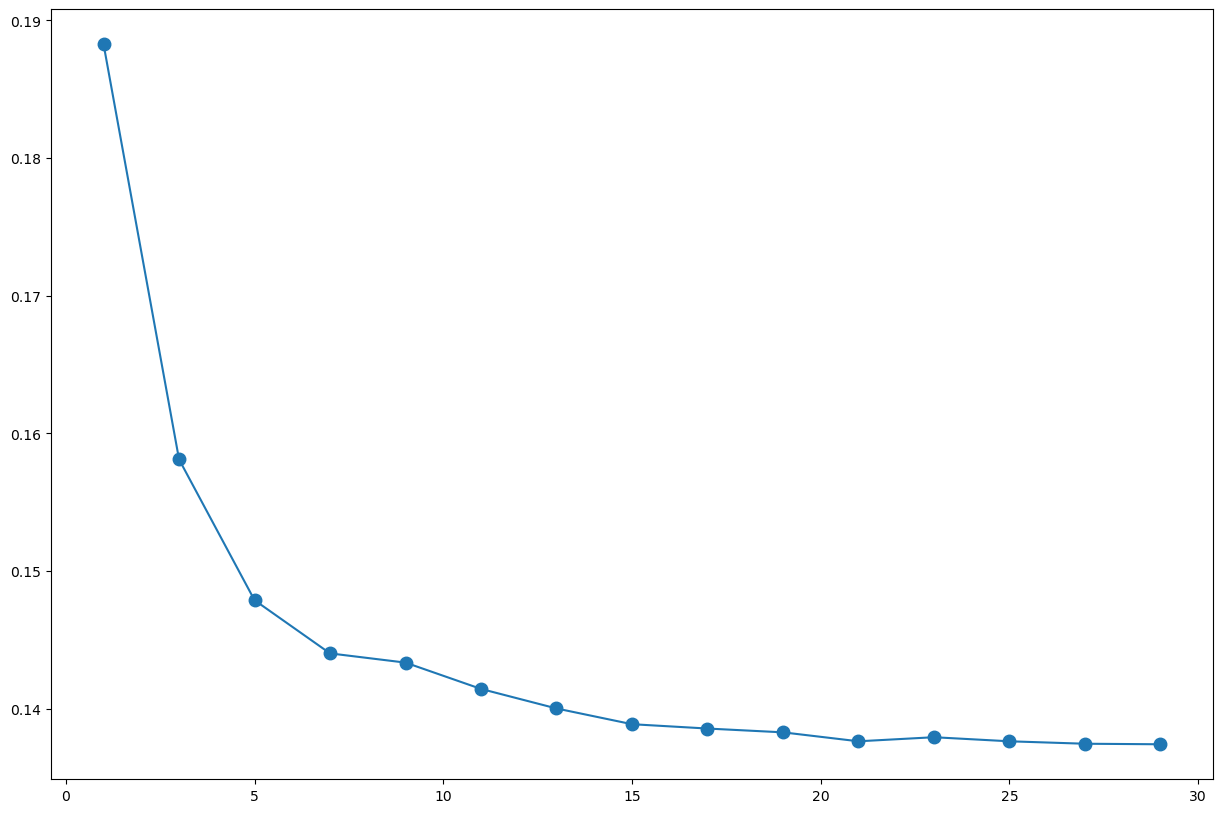

In [12]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [13]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [14]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.8625827814569537


In [15]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [16]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2960943257184967


In [17]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [18]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5533980582524272


## Trial 5

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 5)

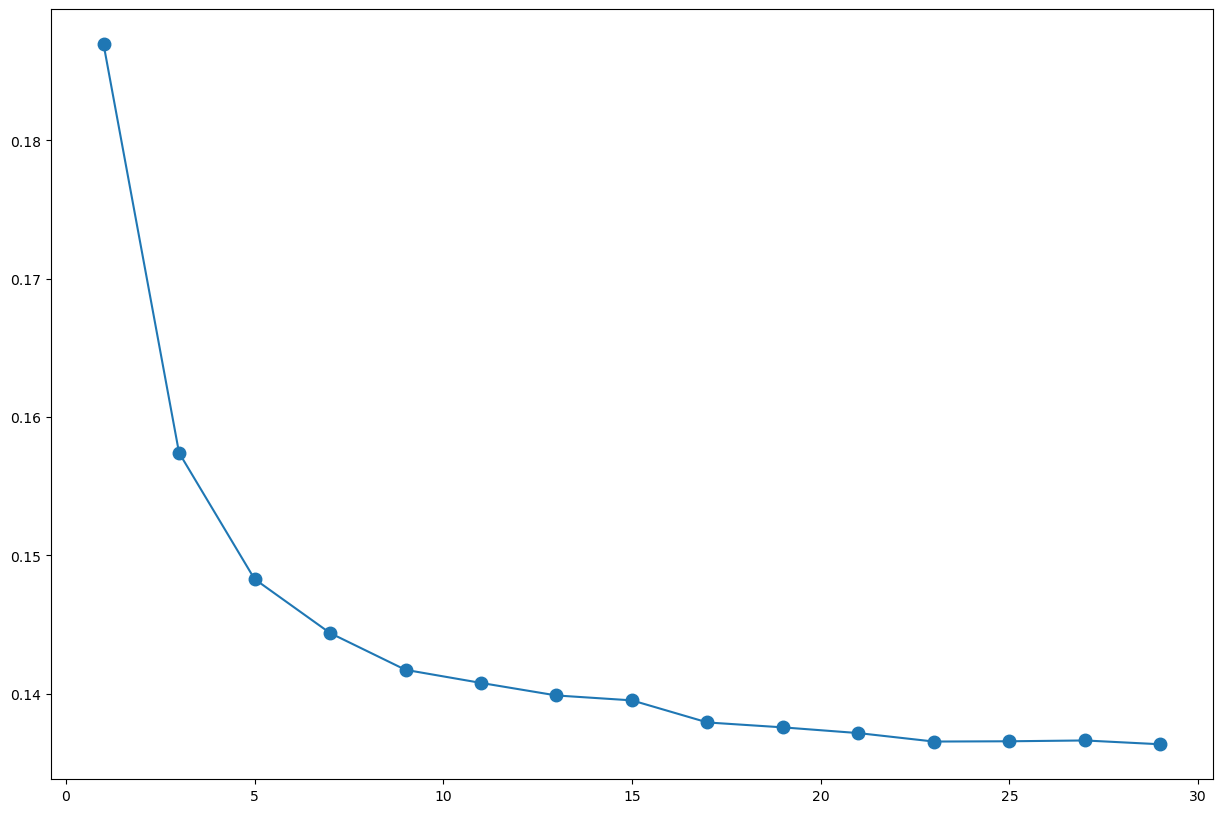

In [20]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [21]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [22]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.863647114474929


In [23]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [24]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2881801125703565


In [25]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [26]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5451807228915663


## Trial 6

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 6)

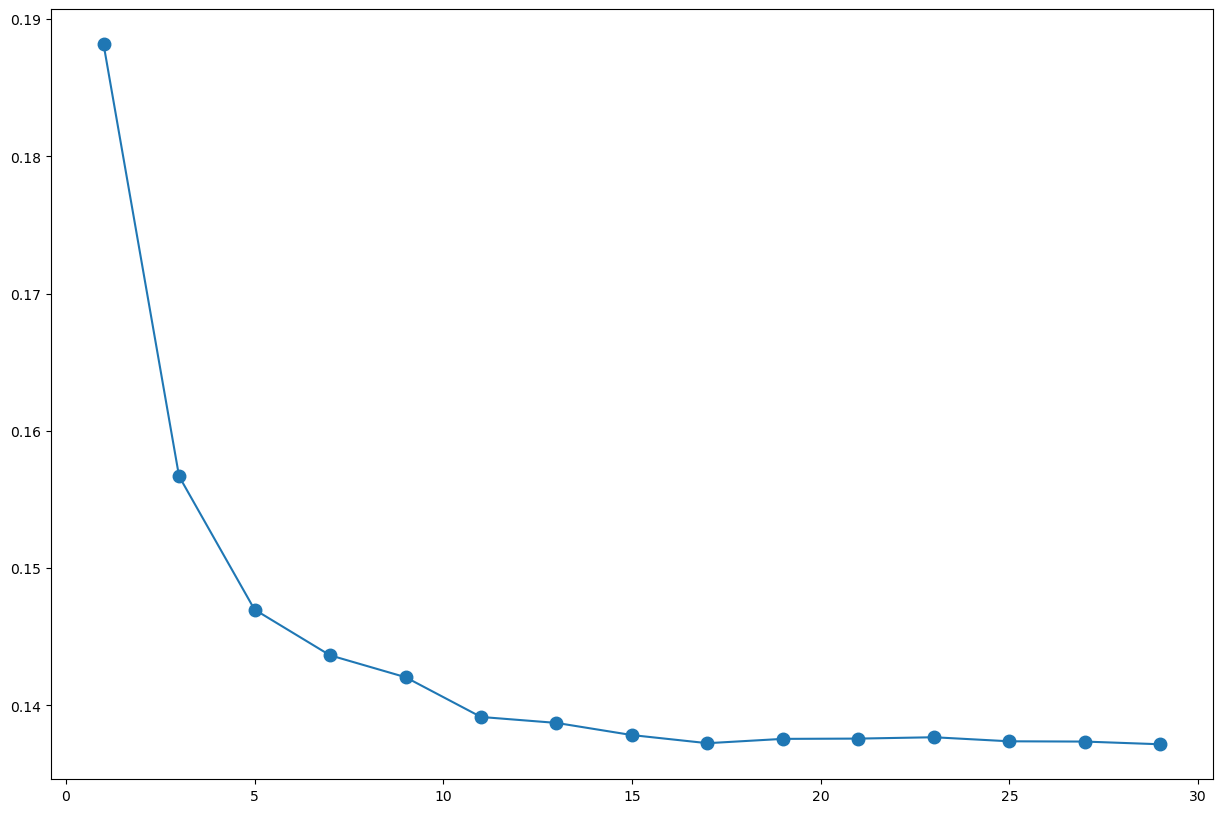

In [28]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [29]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [30]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.8628390097760958


In [31]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [32]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=chebyshev, kvalue= 1): 0.24511741915078675


In [33]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [34]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5404089581304771


## Trial 7

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 7)

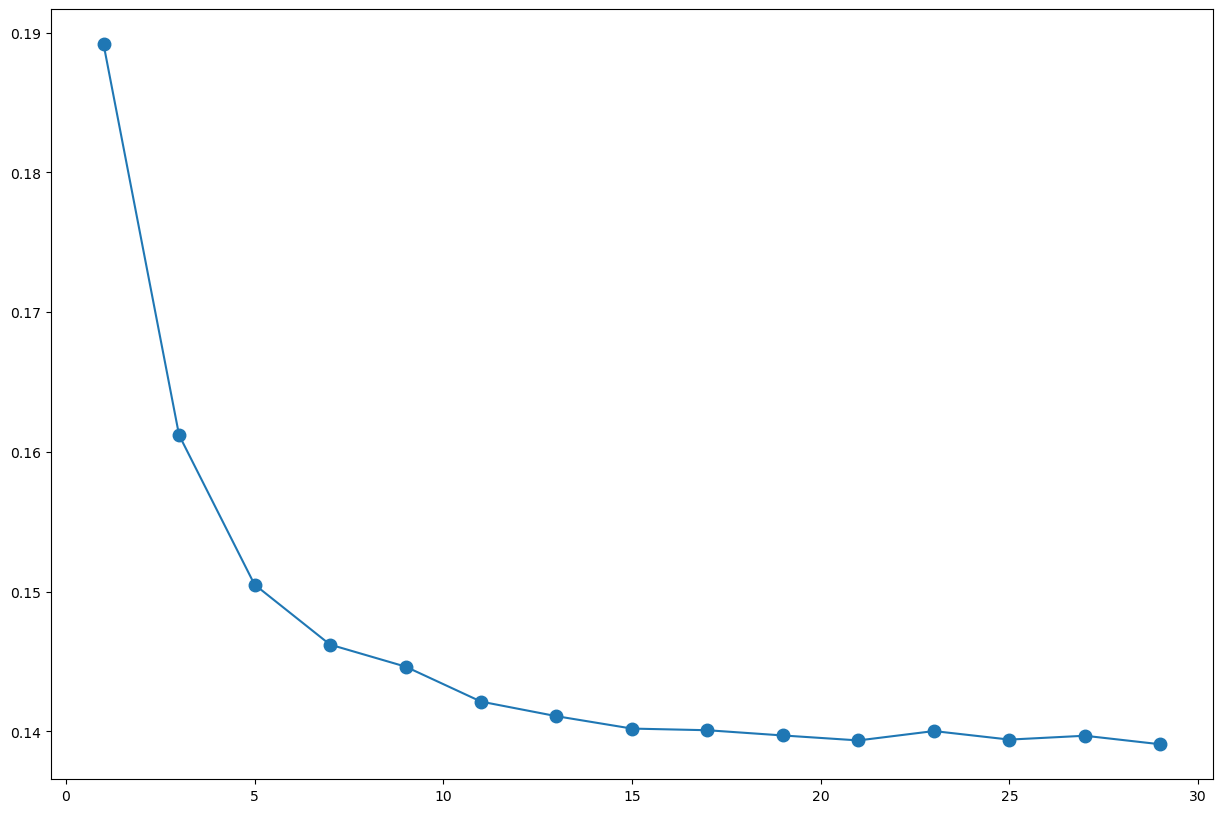

In [36]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [37]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [38]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 29): 0.8609271523178808


In [39]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [40]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2957147050190783


In [41]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [42]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.5746753246753247


## Trial 8

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 8)

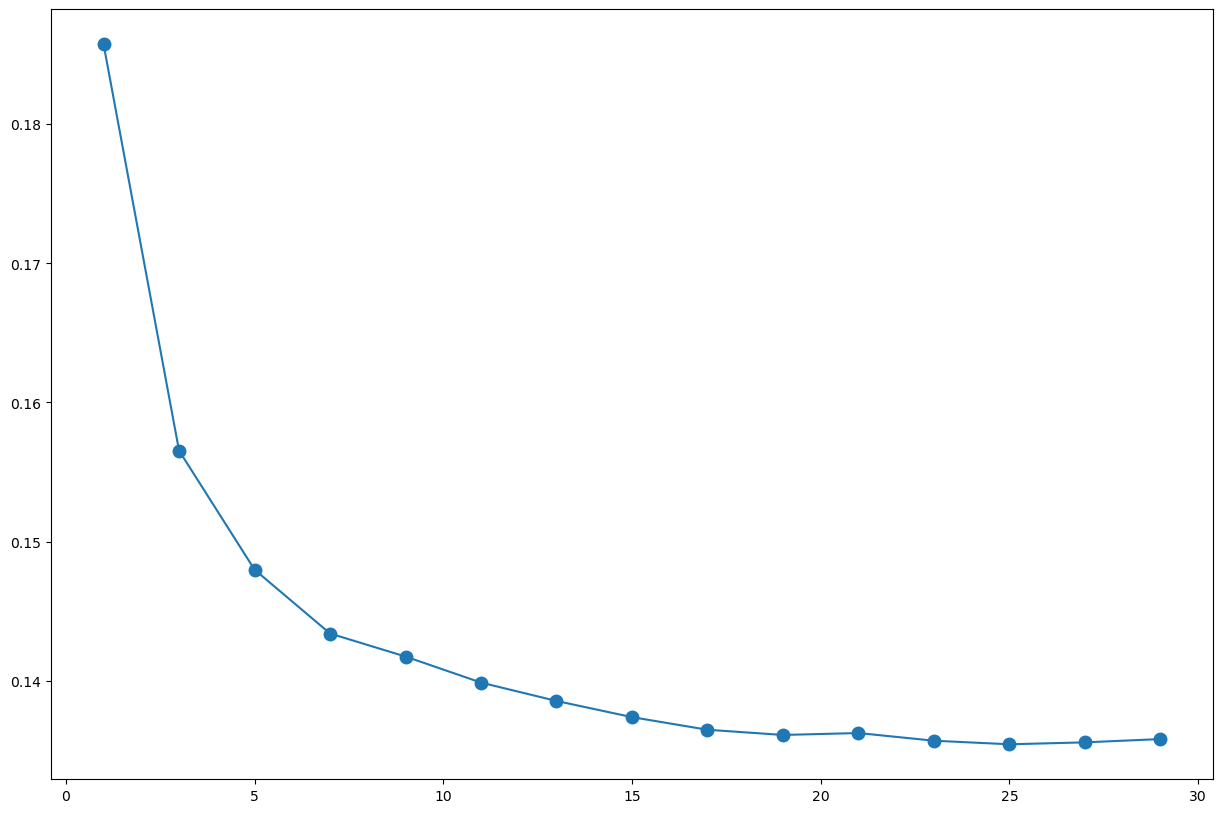

In [44]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [45]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [46]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.8645734783979817


In [47]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [48]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.29492742780188536


In [49]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [50]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 25): 0.5570902394106814


## Trial 9

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 9)

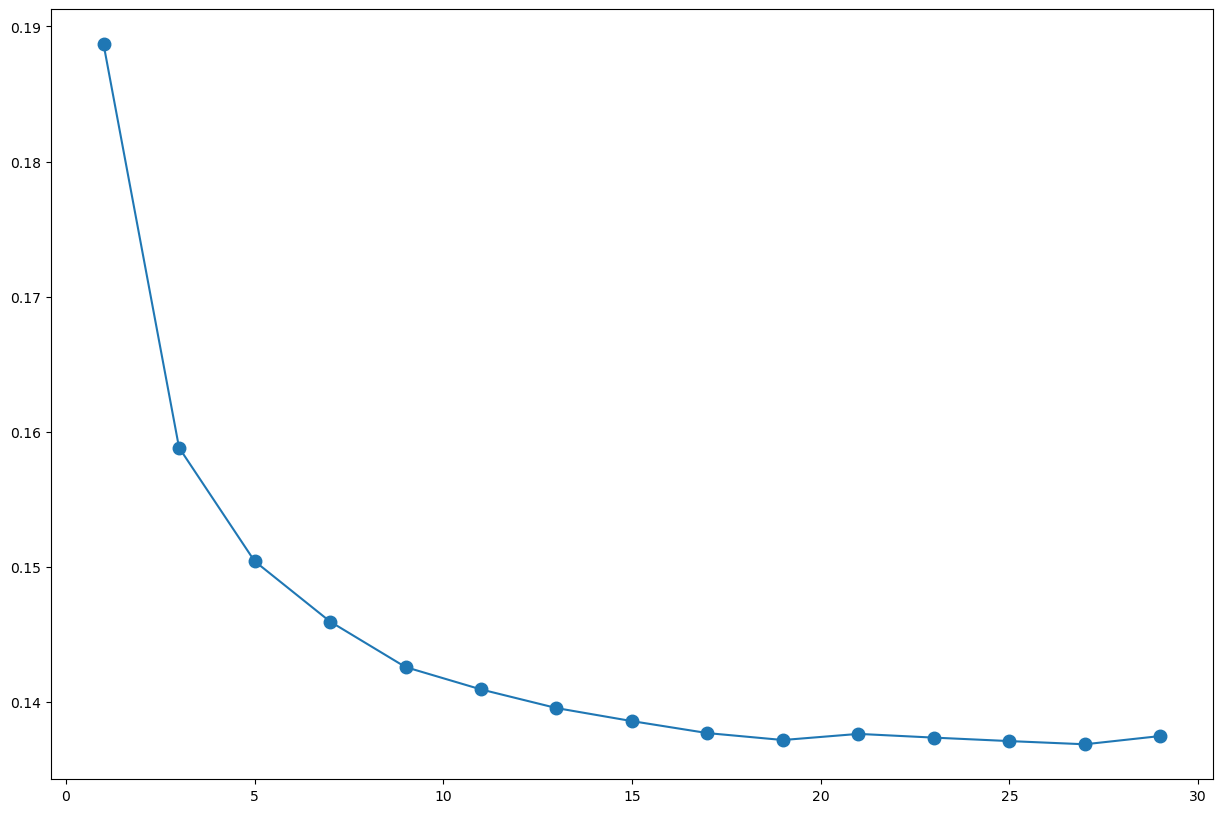

In [52]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [53]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [54]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 27): 0.8631346578366446


In [55]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [56]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.29010011123470525


In [57]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [58]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 27): 0.5690661478599222


## Trial 10

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 10)

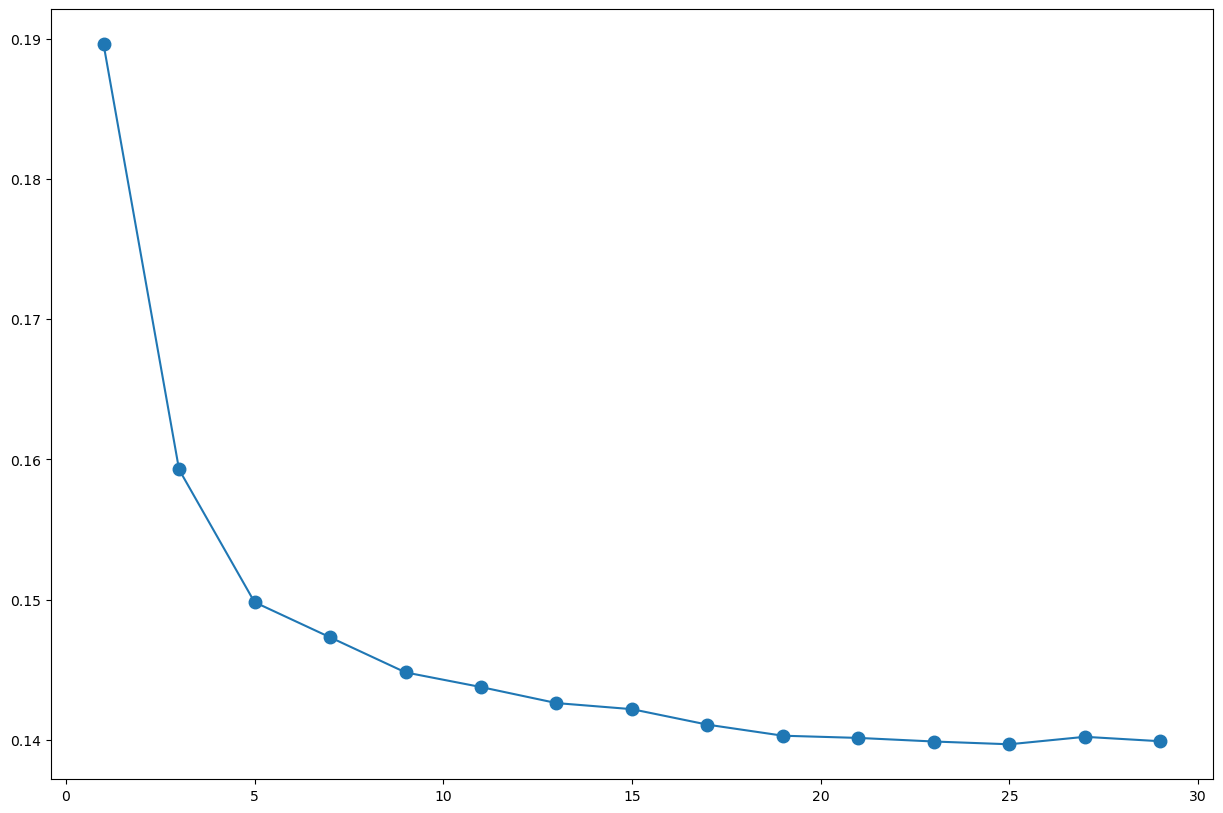

In [60]:
acc = []
f1 = []
precision = []
error_rate = []
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors = i)
    parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
    search_results =  GridSearchCV(neigh, parameters)
    search_results.fit(X_train, Y_train)
    Y_Predicted = search_results.predict(X_test)
    acc.append(search_results.score(X_test, Y_test))
    f1.append(f1_score(Y_test, Y_Predicted))
    precision.append(precision_score(Y_test, Y_Predicted))
    error_rate.append(np.mean(Y_Predicted != Y_test))
plt.figure(figsize=(15,10))
plt.plot(k_value,error_rate, marker='o', markersize=9)

In [61]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[acc.index(max(acc))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [62]:
#get best parameter for metric and print
opt_metric = search_results.best_params_["metric"]
accuracy = search_results.score(X_test, Y_test)
k_accuracy = k_value[acc.index(max(acc))]

accuracy_list.append(accuracy)
accuracy_metric_list.append(opt_metric)
accuracy_k_list.append(k_accuracy)
print(f'Accuracy for optimum classifier(metric={opt_metric}, kvalue= {k_accuracy}): {accuracy}')

Accuracy for optimum classifier(metric=manhattan, kvalue= 25): 0.8603161463260801


In [63]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[f1.index(max(f1))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [64]:
#get best parameter for metric and print
opt_f1_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
f1_Score = f1_score(Y_test,Y_Predicted)
k_f1_score = k_value[f1.index(max(f1))]

f1_list.append(f1_Score)
f1_metric_list.append(opt_f1_metric)
f1_k_list.append(k_f1_score)

print(f'F1 Score for optimum classifier(metric={opt_f1_metric}, kvalue= {k_f1_score}): {f1_Score}')

F1 Score for optimum classifier(metric=manhattan, kvalue= 1): 0.2945361202786945


In [65]:
# initialize our classifier
parameters = {"metric":['euclidean' ,'manhattan','chebyshev','minkowski']}
knn = KNeighborsClassifier(n_neighbors=k_value[precision.index(max(precision))])
search_results =  GridSearchCV(knn, parameters)

# fit the classifier with the training data
search_results.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']})

In [66]:
#get best parameter for metric and print
opt_precision_metric = search_results.best_params_["metric"]
Y_Predicted = search_results.predict(X_test)
Precision_Score = precision_score(Y_test,Y_Predicted)
k_precision = k_value[precision.index(max(precision))]

precision_list.append(Precision_Score)
precision_metric_list.append(opt_precision_metric)
precision_k_list.append(k_precision)

print(f'Precision Score for optimum classifier(metric={opt_precision_metric}, kvalue= {k_precision}): {Precision_Score}')

Precision Score for optimum classifier(metric=manhattan, kvalue= 29): 0.556237218813906


In [67]:
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

Time:  1 day, 4:17:17.323945


## Results

In [78]:
data = {'Accuracy': accuracy_list, 'Accuracy K': accuracy_k_list, 'Accuracy Metric': accuracy_metric_list,
        'Precision': precision_list, 'Precision K': precision_k_list, 'Precision Metric': precision_metric_list,
        'F1_micro':f1_list, 'F1_micro K': f1_k_list, 'F1_micro Metric': f1_metric_list}

In [80]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Accuracy,Accuracy K,Accuracy Metric,Precision,Precision K,Precision Metric,F1_micro,F1_micro K,F1_micro Metric
0,0.862563,29,manhattan,0.546465,29,manhattan,0.293284,1,manhattan
1,0.861991,29,manhattan,0.569182,29,manhattan,0.296486,1,manhattan
2,0.862129,27,manhattan,0.520436,27,manhattan,0.298430,1,manhattan
3,0.862583,29,manhattan,0.553398,29,manhattan,0.296094,1,manhattan
4,0.863647,29,manhattan,0.545181,29,manhattan,0.288180,1,manhattan
5,0.862839,29,manhattan,0.540409,29,manhattan,0.245117,1,chebyshev
6,0.860927,29,manhattan,0.574675,29,manhattan,0.295715,1,manhattan
7,0.864573,25,manhattan,0.557090,25,manhattan,0.294927,1,manhattan
8,0.863135,27,manhattan,0.569066,27,manhattan,0.290100,1,manhattan
9,0.860316,25,manhattan,0.556237,29,manhattan,0.294536,1,manhattan


In [81]:
trainingResults.to_csv('KNN_trainingResults.csv')

### Testing Model

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 11)

In [83]:
from sklearn.metrics import confusion_matrix
acc = []
f1 = []
precision = []
error_rate = []
neigh = KNeighborsClassifier(n_neighbors = 29)
parameters = {"metric":['manhattan']}
search_results =  GridSearchCV(neigh, parameters)
search_results.fit(X_train, Y_train)
Y_Predicted = search_results.predict(X_test)
acc.append(search_results.score(X_test, Y_test))
f1.append(f1_score(Y_test, Y_Predicted))
precision.append(precision_score(Y_test, Y_Predicted))
error_rate.append(np.mean(Y_Predicted != Y_test))
cm = confusion_matrix(Y_test, Y_Predicted)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_Predicted).ravel()

In [85]:
print("Accuracy: " + str(acc[0]) + '\n'
      + "Precision: " + str(precision[0]) + '\n'
      + "F1: " + str(f1[0]) + '\n'
      + "True Negative: " + str(tn) + '\n'
      + "False Positive: " + str(fp) + '\n'
      + "False Negative: " + str(fn) + '\n'
      + "True Positive: " + str(tp) + '\n')

Accuracy: 0.859035004730369
Precision: 0.5397316821465429
F1: 0.12759209563308124
True Negative: 43061
False Positive: 446
False Negative: 6706
True Positive: 523



In [86]:
cm

array([[43061,   446],
       [ 6706,   523]], dtype=int64)